In [38]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets, metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from array import array
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn import preprocessing
#from sklearn.mixture import GMM
#from learning_model import *
#from sklearn.cross_validation import train_test_split
#from data_handle import * 

In [116]:
data = np.genfromtxt('./interface/rsrp_set10_noleft_test.csv', delimiter=',')
df = pd.DataFrame(data,columns=['x','y','pci','rsrp'],index=None)

#print(df)
df.to_csv('./interface/rsrp_set10_noleft_pd.csv',index=None)

                x           y         pci        rsrp
count  211.000000  211.000000  211.000000  211.000000
mean    75.020024   12.848386   39.947867  -81.996271
std     13.735339    6.335032    1.231388   10.989897
min     49.297000    0.970000   38.000000 -125.200000
25%     64.036000    7.743250   39.000000  -89.139387
50%     74.620000   12.547000   40.000000  -81.780247
75%     86.779000   17.966500   41.000000  -72.677395
max    102.170500   24.139000   42.000000  -56.884242


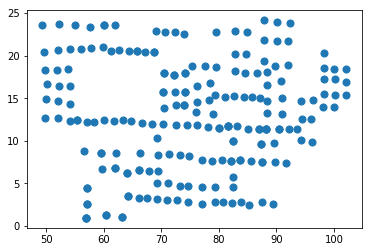

In [117]:
rem_pci_all = pd.read_csv("./interface/rsrp_set10_noleft_pd.csv")
#rem_pci_all = pd.read_csv("./interface/rsrp_set33_nodis_noleft.csv")
#rem_pci_all = pd.read_csv("rem_pci_train_pd.csv")
#rem_pci = pd.read_csv("rem_rsrp_train_pd.csv")
#rem_test = pd.read_csv("rem_test_pd.csv")
#rem_pci_np = np.genfromtxt('rem_pci_train.csv', delimiter=',')
#rem_rsrp = pd.read_csv("rem_rsrp_train.csv")
#print(rem_pci_all)
plt.scatter(rem_pci_all['x'], rem_pci_all['y'], s=50);
#print(type(rem_pci_all))
print(rem_pci_all.describe())



In [118]:
#rem_pci_all = preprocessing.scale(rem_pci_all)
#print (rem_pci_all)
#np.savetxt('normalize.csv', rem_pci_all, delimiter=',', fmt='%f')

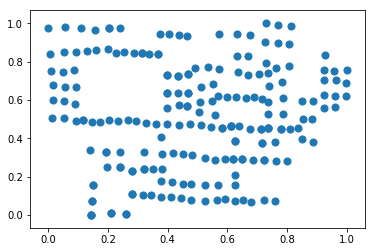

In [119]:
#print (rem_pci_all)
#print (type(rem_pci_all))
#print(rem_pci_all)

rem_pci_all.insert(4,"pci_37",0)
rem_pci_all.insert(5,"pci_38",0) 
rem_pci_all.insert(6,"pci_39",0) 
rem_pci_all.insert(7,"pci_40",0)
rem_pci_all.insert(8,"pci_41",0) 
rem_pci_all.insert(9,"pci_42",0) 
'''
rem_pci_all.insert(5,"pci_37",0)
rem_pci_all.insert(6,"pci_38",0) 
rem_pci_all.insert(7,"pci_39",0) 
rem_pci_all.insert(8,"pci_40",0)
rem_pci_all.insert(9,"pci_41",0) 
rem_pci_all.insert(10,"pci_42",0) 
'''

for i in range(0,len(rem_pci_all)):
    if rem_pci_all.iloc[i,2] == 37:
        rem_pci_all.iloc[i,4] = "1"
    if rem_pci_all.iloc[i,2] == 38:
        rem_pci_all.iloc[i,5] = "1"
    if rem_pci_all.iloc[i,2] == 39:
        rem_pci_all.iloc[i,6] = "1"
    if rem_pci_all.iloc[i,2] == 40:
        rem_pci_all.iloc[i,7] = "1"
    if rem_pci_all.iloc[i,2] == 41:
        rem_pci_all.iloc[i,8] = "1"
    if rem_pci_all.iloc[i,2] == 42:
        rem_pci_all.iloc[i,9] = "1"
'''
for i in range(0,len(rem_pci_all)):
    if rem_pci_all.iloc[i,2] == 3700:
        rem_pci_all.iloc[i,5] = "1"
    if rem_pci_all.iloc[i,2] == 3800:
        rem_pci_all.iloc[i,6] = "1"
    if rem_pci_all.iloc[i,2] == 3900:
        rem_pci_all.iloc[i,7] = "1"
    if rem_pci_all.iloc[i,2] == 4000:
        rem_pci_all.iloc[i,8] = "1"
    if rem_pci_all.iloc[i,2] == 4100:
        rem_pci_all.iloc[i,9] = "1"
    if rem_pci_all.iloc[i,2] == 4200:
        rem_pci_all.iloc[i,10] = "1"
'''
#print(rem_pci_all)
#print("==========")
rem_pci_all = rem_pci_all[['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci']]
#rem_pci_all = rem_pci_all[['x','y','rsrp','dis','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci']]
rem_pci_all_copy = rem_pci_all
rem_pci_all_cut = rem_pci_all.drop(['pci'], axis=1)
#print(rem_pci_all)
#print(rem_pci_all)
#print("===")  
rem_pci_all=rem_pci_all_cut.values
#print (type(rem_pci_all))
#print (rem_pci_all)
#:::Normalize[0,1]
#print(rem_pci_all_cut)
min_max_scaler = preprocessing.MinMaxScaler()
rem_pci_all_n = min_max_scaler.fit_transform(rem_pci_all_cut)
#:::Normalize[-1,1]
  #max_abs_scaler = preprocessing.MaxAbsScaler()
  #rem_pci_all_n = max_abs_scaler.fit_transform(rem_pci_all_cut)

#:::Standardisation
#print(rem_pci_all_cut)
  #rem_pci_all_n = preprocessing.scale(rem_pci_all_cut)
#print(rem_pci_all_n.mean(axis=0))
#print(rem_pci_all_n.std(axis=0))
#print(rem_pci_all_n)
#print("===")  
rem_pci_all_n_pd = pd.DataFrame(rem_pci_all_n,columns = ['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42'])
#print(rem_pci_all_n_pd)
rem_pci_all_n_pd.to_csv("./debug/rem_pci_all_n_pd.csv")

for i in range(0,len(rem_pci_all_n_pd)):
    if rem_pci_all_n_pd.iloc[i,3] == 1:
        rem_pci_all_n_pd.iloc[i,3] = "0.2"
    if rem_pci_all_n_pd.iloc[i,4] == 1:
        rem_pci_all_n_pd.iloc[i,4] = "0.2"
    if rem_pci_all_n_pd.iloc[i,5] == 1:
        rem_pci_all_n_pd.iloc[i,5] = "0.2"
    if rem_pci_all_n_pd.iloc[i,6] == 1:
        rem_pci_all_n_pd.iloc[i,6] = "0.2"
    if rem_pci_all_n_pd.iloc[i,7] == 1:
        rem_pci_all_n_pd.iloc[i,7] = "0.2"
    if rem_pci_all_n_pd.iloc[i,8] == 1:
        rem_pci_all_n_pd.iloc[i,8] = "0.2"

#print (rem_pci_all_n_pd)

plt.scatter(rem_pci_all_n_pd['x'], rem_pci_all_n_pd['y'], s=50);


In [120]:
def group(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y','pci']).apply(pd.DataFrame.mode)
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

In [121]:
def group_pcimap(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y']).median()
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

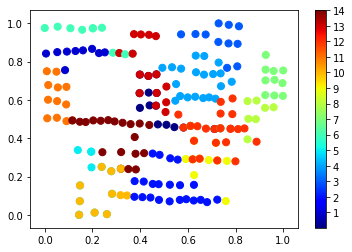

In [122]:
#print(rem_pci_all_n_pd)
group_median,group_drift = group_pcimap(rem_pci_all_n_pd)
#rsrp,group_drift = group(rem_rsrp)
#print("rem_rsrp==",rsrp)
#rem_rsrp.to_csv("rsrp.csv")
#group_median,group_drift = group(rem_test)
kmeans = KMeans(n_clusters=15)
#np.savetxt('group_median.csv', group_median, delimiter=',', fmt='%f')
#group_median = pd.read_csv("group_median.csv")
#print(rem_pci['pci'])
kmeans_fit = kmeans.fit(rem_pci_all_n_pd)
y_kmeans = kmeans.predict(rem_pci_all_n_pd)
#kmeans_fit = kmeans.fit(group_median)
#print(group_median)
#y_kmeans = kmeans.predict(group_median)
#print(y_kmeans)
#print(y_kmeans.shape)


#print(y_kmeans_pd)

#add_kmeans = pd.merge(rem_pci,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans.to_csv('add_kmeans.csv')
#print(group_median)
rem_pci_all_pd = pd.DataFrame(rem_pci_all_copy,columns=['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci'])
#print(type(rem_pci_all_pd))
#print(type(add_kmeans))

#print(rem_pci_all_pd)

plt.scatter(rem_pci_all_n_pd['x'], rem_pci_all_n_pd['y'], s=50, c=y_kmeans, cmap='jet');
y_kmeans_pd = pd.DataFrame({'zone':y_kmeans})
add_kmeans = pd.merge(rem_pci_all_pd,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans = pd.merge(rem_pci_all_pd['pci'],add_kmeans, left_index=True, right_index=True)
for i in range(14,-1,-1):
    add_kmeans['zone'].replace(i,i+1,inplace=True)
'''
add_kmeans['zone'].replace(5,6,inplace=True)
add_kmeans['zone'].replace(4,5,inplace=True)
add_kmeans['zone'].replace(3,4,inplace=True)
add_kmeans['zone'].replace(2,3,inplace=True)
add_kmeans['zone'].replace(1,2,inplace=True)
add_kmeans['zone'].replace(0,1,inplace=True)
'''
add_kmeans['pci'] = add_kmeans['pci'].map(lambda x:int(x))

add_kmeans.to_csv('aaa.csv')
add_kmeans.values[:,:]
add_kmeans = add_kmeans.drop(['pci_37','pci_38','pci_39','pci_40','pci_41','pci_42'], axis=1)
add_kmeans = add_kmeans[['x','y','pci','rsrp','zone']]
add_kmeans = add_kmeans.values
#print(add_kmeans)
np.savetxt('./zone_result/set10_noleft_cluster.csv', add_kmeans, delimiter=',', fmt='%s')
#y_kmeans = np.reshape(y_kmeans, (27, 105))
#np.savetxt('y_kmeans.csv', y_kmeans, delimiter=',', fmt='%f')
cluster_labels = kmeans_fit.labels_
silhouette_avg = metrics.silhouette_score(rem_pci_all_n_pd, cluster_labels)
#print(silhouette_avg)
plt.colorbar(ticks=range(1,15))

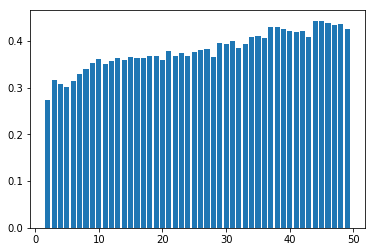

[0.27307767502328434, 0.31618722818482536, 0.3077699120485077, 0.301939192386881, 0.31369613830188103, 0.32946109341965424, 0.33942494056543054, 0.35304271289228256, 0.3620318511808112, 0.35068499186787266, 0.3573143129558437, 0.36404693494738166, 0.3595914823338852, 0.3656759182694395, 0.3629756833107421, 0.3626705628500274, 0.3683390704805438, 0.3666924147902757, 0.35964433975602816, 0.3783747803524421, 0.3679484154790553, 0.37452984323135163, 0.36828144784429473, 0.37550191848639336, 0.38015288997476104, 0.3828959352746851, 0.36572053029920065, 0.39464938194999666, 0.3931005648674928, 0.39995354074908485, 0.38393430200395884, 0.3926318762190701, 0.40751750297623496, 0.40944965526483723, 0.40539605469106804, 0.42986724944228394, 0.43004462720542586, 0.42560401250472596, 0.4210105841738726, 0.4183993148263434, 0.42189619504951115, 0.40934116667995124, 0.44316602168021074, 0.4423777488185512, 0.43740861425644556, 0.4342289938203175, 0.43626080298831355, 0.4249598920747618]


In [48]:
# 迴圈
silhouette_avgs = []
ks = range(2, 50)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(rem_pci_all_n_pd)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(rem_pci_all_n_pd, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)